In [1]:
import numpy as np
import pandas as pd
from collections import Counter
from random import shuffle
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

In [2]:
train_data = np.load('data/training_data-1.npy')
df = pd.DataFrame(train_data)
print(df.head())
print(Counter(df[1].apply(str)))

                                                   0  \
0  [[[238, 204, 171], [246, 231, 216], [69, 55, 4...   
1  [[[238, 204, 171], [246, 231, 216], [69, 57, 4...   
2  [[[238, 204, 171], [246, 231, 216], [69, 55, 4...   
3  [[[238, 204, 171], [246, 231, 216], [63, 51, 3...   
4  [[[238, 204, 171], [246, 231, 216], [91, 90, 8...   

                             1  
0  [1, 0, 0, 0, 0, 0, 0, 0, 0]  
1  [1, 0, 0, 0, 0, 0, 0, 0, 0]  
2  [0, 0, 0, 0, 1, 0, 0, 0, 0]  
3  [0, 0, 0, 0, 0, 1, 0, 0, 0]  
4  [0, 0, 0, 0, 1, 0, 0, 0, 0]  
Counter({'[1, 0, 0, 0, 0, 0, 0, 0, 0]': 177, '[0, 0, 0, 0, 0, 1, 0, 0, 0]': 163, '[0, 0, 0, 0, 0, 0, 0, 0, 0]': 148, '[0, 0, 0, 0, 1, 0, 0, 0, 0]': 69, '[0, 0, 1, 0, 0, 0, 0, 0, 0]': 41, '[0, 0, 0, 1, 0, 0, 0, 0, 0]': 13, '[0, 0, 0, 0, 0, 0, 0, 1, 0]': 1})


In [8]:
df = pd.DataFrame(train_data)
print(df.head())
print(Counter(df[1].apply(str)))

                                                   0  \
0  [[[158, 176, 200], [106, 109, 127], [133, 130,...   
1  [[[158, 176, 200], [106, 109, 127], [133, 130,...   
2  [[[158, 176, 200], [106, 109, 127], [133, 130,...   
3  [[[158, 176, 200], [106, 109, 127], [133, 130,...   
4  [[[158, 176, 200], [106, 109, 127], [133, 130,...   

                             1  
0  [0, 0, 0, 0, 0, 0, 0, 0, 0]  
1  [0, 0, 0, 0, 0, 0, 0, 0, 0]  
2  [0, 0, 0, 0, 0, 0, 0, 0, 0]  
3  [0, 0, 0, 0, 0, 0, 0, 0, 0]  
4  [0, 0, 0, 0, 0, 0, 0, 0, 0]  
Counter({'[0, 0, 0, 0, 0, 0, 0, 0, 0]': 250, '[1, 0, 0, 0, 0, 0, 0, 0, 0]': 166, '[0, 0, 1, 0, 0, 0, 0, 0, 0]': 31, '[0, 0, 0, 0, 0, 1, 0, 0, 0]': 21, '[0, 0, 0, 1, 0, 0, 0, 0, 0]': 20, '[0, 0, 0, 0, 1, 0, 0, 0, 0]': 7, '[0, 1, 0, 0, 0, 0, 0, 0, 0]': 5})


In [8]:
def show_rgb_img(idx):
    img = cv2.cvtColor(train_data[idx][0], cv2.COLOR_BGR2RGB)
    imgplot = plt.imshow(img)
    print(train_data[idx][1])

In [16]:
train_data[250][1]

[0, 0, 0, 0, 0, 0, 0, 0, 0]

[0, 0, 0, 0, 0, 0, 0, 0, 0]


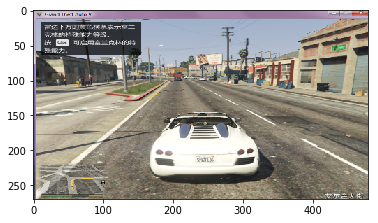

In [17]:
show_saved_data(250)

[0, 0, 0, 0, 0, 0, 0, 0, 0]


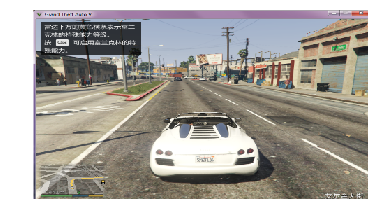

In [23]:
show_saved_data(250)

In [13]:
def roi(img, vertices):
    mask = np.zeros_like(img)
    cv2.fillPoly(mask, vertices, 255)
    masked = cv2.bitwise_and(img, mask)
    return masked
def draw_lines(img,lines,color=[255,255,255],width=8):
    for line in lines:
        coords = line[0]
        cv2.line(img, (coords[0], coords[1]), (coords[2], coords[3]), [255,255,255], 8)

In [8]:
def display_image_win(pos,img):
    cv2.imshow(pos, img)

def destroy_win():    
    while True:
        #if cv2.waitKey(25) & 0xFF == ord('q'):
        if cv2.waitKey(0) & 0xFF == ord('q'):
            cv2.destroyAllWindows()
            break

In [9]:
def show_saved_data(idx):
    plt.figure()
    plt.axis("off")
    #since matplotlib diplay picture in RGB, we need to convert to rgb
    rgb_img = cv2.cvtColor(train_data[idx][0], cv2.COLOR_BGR2RGB)
    imgplot = plt.imshow(rgb_img)
    print(train_data[idx][1])

def get_rgb_img(img, title=None):
    plt.figure()
    
    plt.axis("off")
    #since matplotlib diplay picture in RGB, we need to convert to rgb
    rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    if title:
        plt.title(title)
    imgplot = plt.imshow(rgb_img)
    return rgb_img

def show_rgb_img(img, title=None):
    get_rgb_img(img, title)

def show_raw_img(img, title=None):
    plt.figure()
    plt.axis("off")
    if title:
        plt.title(title)
    imgplot = plt.imshow(img)
    #plt.colorbar()  

def get_saved_data(idx):
    return train_data[idx][0].copy(),train_data[idx][1].copy()

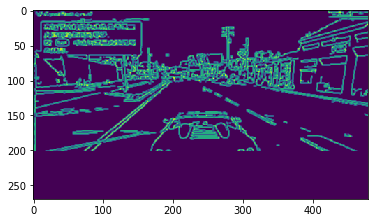

In [9]:
img, action = get_saved_data(250)
processed_img = cv2.Canny(img, threshold1=200, threshold2=300)
#processed_img = cv2.Canny(gray_img, threshold1=200, threshold2=300)
processed_img = cv2.GaussianBlur(processed_img, (3,3), 0 )    
vertices = np.array([[0,200],[0,0],[800,0],[800,200]], np.int32)
processed_img = roi(processed_img, [vertices])
lines = cv2.HoughLinesP(processed_img, 1, np.pi/180, 120, 20, 35)
plt.imshow(processed_img)    
#lines

# 探测边缘

In [5]:
#https://henrydangprg.com/2016/12/11/canny-edge-detection-in-python-with-opencv/
def detect_edge(rgb_image):
    gray_img = cv2.cvtColor(rgb_image, cv2.COLOR_BGR2GRAY)   
    #processed_img = cv2.Canny(rgb_image, threshold1=200, threshold2=300)
    #processed_img = cv2.Canny(gray_img, threshold1=130, threshold2=226)
    processed_img = cv2.Canny(gray_img, threshold1=48, threshold2=338)    
    processed_img = cv2.GaussianBlur(processed_img, (3,3), 0 )
    #vertices = np.array([[0,200],[0,0],[800,0],[800,200]], np.int32)
    #processed_img = roi(processed_img, [vertices])
    #plt.imshow(processed_img)    
    
    lines = cv2.HoughLinesP(processed_img, 1, np.pi/180, 120, 20, 35)
    #print(lines)
    #draw_lines(processed_img,lines)    
    return processed_img, lines

In [15]:
def region_of_interest(img, vertices):
    mask = np.zeros_like(img)
    
    if len(img.shape) >2:
        channel_count = img.shape[2]
        ignore_mask_color = (255,) * channel_count
    else:
        ignore_mask_color = 255
    
    cv2.fillPoly(mask, vertices, ignore_mask_color)
    
    masked_imge = cv2.bitwise_and(img, mask)
    return masked_imge

In [16]:
def display_image_win(pos,img):
    cv2.imshow(pos, img)

def destroy_win():    
    while True:
        #if cv2.waitKey(25) & 0xFF == ord('q'):
        if cv2.waitKey(0) & 0xFF == ord('q'):
            cv2.destroyAllWindows()
            break

In [19]:
img, action = get_saved_data(260)
org_img = train_data[260][0]
ROI_VERTICES = np.array([[(0,20),(400.,20),(400,200),(0,200)]], dtype=np.int32)
roi_img = region_of_interest(org_img, ROI_VERTICES)
img = roi_img
display_image_win('window',img)
# use detect_edge is so easy!!!
new_screen, hlines= detect_edge(img)
#display_image_win('window2',gray_img)
display_image_win('window2',new_screen)
draw_lines(new_screen,hlines)
display_image_win('window3',new_screen)
#cv2.circle(original_image,(480,270),10,[255,0,0])
destroy_win()

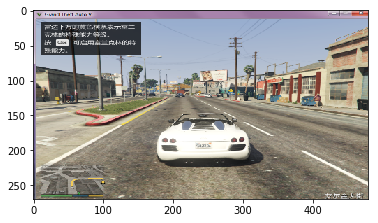

In [18]:
img = cv2.cvtColor(train_data[260][0], cv2.COLOR_BGR2RGB)
imgplot = plt.imshow(img)


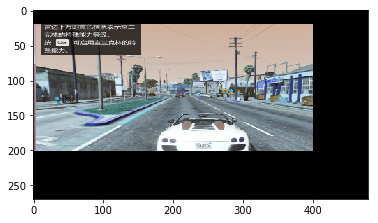

In [19]:
org_img = train_data[260][0]
ROI_VERTICES = np.array([[(0,20),(400.,20),(400,200),(0,200)]], dtype=np.int32)
roi_img = region_of_interest(org_img, ROI_VERTICES)
hsv = cv2.cvtColor(roi_img, cv2.COLOR_BGR2HSV)
lower_white = np.array([])
upper_white = np.array([])


#imgplot = plt.imshow(roi_img)